<a href="https://colab.research.google.com/github/AnantaJoy/test-1/blob/main/PFASDataAnalysis_Dec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if missing)
!pip install seaborn scikit-learn xgboost lightgbm


In [ ]:
import pandas as pd

df = pd.read_csv('/content/pfas_step6.csv')
df.head()


,forest,water,biosolids,textile,PFAS
0,70.57,3.4,36602.17,34,3.688204
1,35.16,14.2,0.00,2,2.239645
2,25.64,0.3,76490.00,33,3.615233
3,56.31,2.1,70623.40,19,2.275008
4,32.71,4.8,677272.73,254,3.151282


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   forest     50 non-null     float64
 1   water      50 non-null     float64
 2   biosolids  50 non-null     float64
 3   textile    50 non-null     int64  
 4   PFAS       50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


,forest,water,biosolids,textile,PFAS
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,43.250600,8.320000,118202.746000,41.680000,2.876057
std,22.051364,10.246234,140778.378479,48.692471,0.648391
min,1.720000,0.200000,0.000000,2.000000,1.147402
25%,29.330000,1.625000,26347.157500,10.500000,2.449578
50%,42.125000,3.300000,62556.645000,23.500000,2.996039
75%,58.027500,12.750000,140640.130000,57.750000,3.234759
max,89.460000,41.500000,677272.730000,254.000000,4.194190


In [ ]:
df = df.dropna()   # simplest safe method first


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('PFAS', axis=1)
y = df['PFAS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((40, 4), (10, 4))

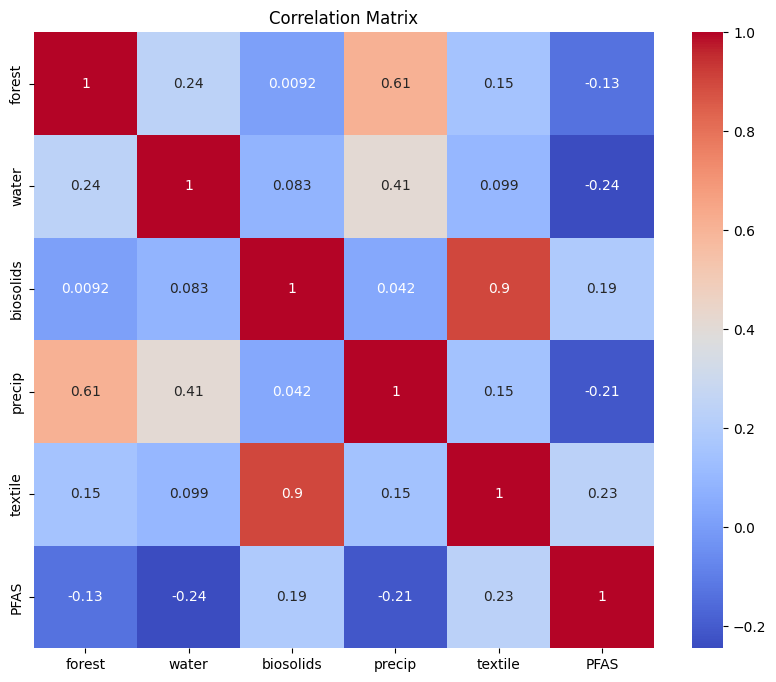

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


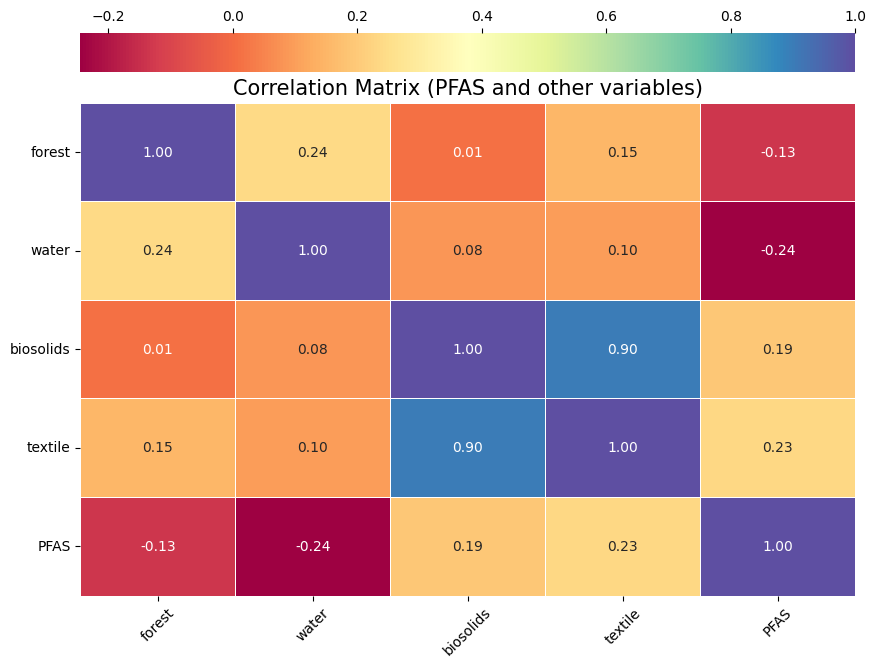

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    linewidths=.5,
    cbar_kws={"location": "top"},
)
plt.title("Correlation Matrix (PFAS and other variables)", fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
import numpy as np

baseline_pred = np.ones(len(y_test)) * y_train.mean()

from sklearn.metrics import mean_absolute_error, mean_squared_error

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

baseline_mae, baseline_rmse

(0.47201687620828103, np.float64(0.5496976144250605))

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)

lr_mae, lr_rmse

(0.4735899517692147, np.float64(0.5622339044416527))

In [ ]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np # Import numpy if not already imported

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Calculate MSE first, then take the square root for RMSE
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

ridge_rmse, lasso_rmse

(np.float64(0.5622229327343046), np.float64(0.5618647043088314))

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np # Import numpy if not already imported

svr_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel='rbf'))
])

svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Calculate MSE first, then take the square root for RMSE
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

np.float64(0.5311843909488498)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import numpy if not already imported

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calculate MSE first, then take the square root for RMSE
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

np.float64(0.6458697581590318)

In [ ]:
from xgboost import XGBRegressor
import numpy as np # Ensure numpy is imported
from sklearn.metrics import mean_squared_error # Ensure mean_squared_error is imported

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

np.float64(0.672120674215376)

In [ ]:
results = pd.DataFrame({
    "Model": ["Baseline", "Linear", "Ridge", "Lasso", "SVR", "RandomForest", "XGBoost"],
    "RMSE": [baseline_rmse, lr_rmse, ridge_rmse, lasso_rmse, svr_rmse, rf_rmse, xgb_rmse]
})

results.sort_values("RMSE")


,Model,RMSE
4,SVR,0.531184
0,Baseline,0.549698
3,Lasso,0.561865
2,Ridge,0.562223
1,Linear,0.562234
5,RandomForest,0.645870
6,XGBoost,0.672121


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Create lists to hold the MAE and R2 scores for each model
mae_scores = []
r2_scores = []

# Calculate metrics for Baseline
mae_scores.append(mean_absolute_error(y_test, baseline_pred))
r2_scores.append(r2_score(y_test, baseline_pred))

# Calculate metrics for Linear Regression
mae_scores.append(mean_absolute_error(y_test, lr_pred))
r2_scores.append(r2_score(y_test, lr_pred))

# Calculate metrics for Ridge Regression
mae_scores.append(mean_absolute_error(y_test, ridge_pred))
r2_scores.append(r2_score(y_test, ridge_pred))

# Calculate metrics for Lasso Regression
mae_scores.append(mean_absolute_error(y_test, lasso_pred))
r2_scores.append(r2_score(y_test, lasso_pred))

# Calculate metrics for SVR
mae_scores.append(mean_absolute_error(y_test, svr_pred))
r2_scores.append(r2_score(y_test, svr_pred))

# Calculate metrics for RandomForest
mae_scores.append(mean_absolute_error(y_test, rf_pred))
r2_scores.append(r2_score(y_test, rf_pred))

# Calculate metrics for XGBoost
mae_scores.append(mean_absolute_error(y_test, xgb_pred))
r2_scores.append(r2_score(y_test, xgb_pred))

# Add the new columns to the existing results DataFrame
results['MAE'] = mae_scores
results['R2'] = r2_scores

# Sort the DataFrame by 'R2' in descending order
results_df = results.sort_values(by="R2", ascending=False)
results_df

,Model,RMSE,MAE,R2
4,SVR,0.531184,0.426537,0.041581
0,Baseline,0.549698,0.472017,-0.026390
3,Lasso,0.561865,0.473578,-0.072330
2,Ridge,0.562223,0.473584,-0.073698
1,Linear,0.562234,0.473590,-0.073740
5,RandomForest,0.645870,0.468394,-0.416951
6,XGBoost,0.672121,0.446893,-0.534474


In [ ]:
display(results_df)

,Model,RMSE,MAE,R2
4,SVR,0.531184,0.426537,0.041581
0,Baseline,0.549698,0.472017,-0.026390
3,Lasso,0.561865,0.473578,-0.072330
2,Ridge,0.562223,0.473584,-0.073698
1,Linear,0.562234,0.473590,-0.073740
5,RandomForest,0.645870,0.468394,-0.416951
6,XGBoost,0.672121,0.446893,-0.534474


In [ ]:
import pandas as pd
import numpy as np

# Sample data (replace with your dataframe)
data = {
    "Model": ["Support Vector Regression", "Neural Network", "Lasso Regression", "Ridge Regression",
              "Linear Regression", "KNN Regressor", "Random Forest", "Gradient Boosting"],
    "R2_test": [0.103959, -0.003491, -0.096036, -0.133441, -0.165295, -0.266929, -0.312093, -0.940061],
    "RMSE_test": [0.513608, 0.543531, 0.568041, 0.577653, 0.585714, 0.610722, 0.621512, 0.755745],
    "MAE_test": [0.411801, 0.304611, 0.484748, 0.499415, 0.506013, 0.450837, 0.476589, 0.518928],
    "CV_R2_mean": [-0.731584, -2.048088, -0.608825, -0.560182, -0.693524, -0.382190, -0.465374, -0.621801]
}

df = pd.DataFrame(data)

# Create a beautiful styled table
styled = (
    df.style
    .background_gradient(cmap="viridis", axis=0)     # color columns
    .highlight_max(color="lightgreen")               # best values
    .highlight_min(color="salmon")                   # worst values
    .set_properties(**{
        "border": "1px solid black",
        "padding": "8px",
        "font-size": "14px"
    })
    .set_table_styles([
        {"selector": "th",
         "props": [("background-color", "#1f1f1f"),
                   ("color", "white"),
                   ("font-size", "16px"),
                   ("padding", "10px")]}
    ])
)

styled


,Model,R2_test,RMSE_test,MAE_test,CV_R2_mean
0,Support Vector Regression,0.103959,0.513608,0.411801,-0.731584
1,Neural Network,-0.003491,0.543531,0.304611,-2.048088
2,Lasso Regression,-0.096036,0.568041,0.484748,-0.608825
3,Ridge Regression,-0.133441,0.577653,0.499415,-0.560182
4,Linear Regression,-0.165295,0.585714,0.506013,-0.693524
5,KNN Regressor,-0.266929,0.610722,0.450837,-0.382190
6,Random Forest,-0.312093,0.621512,0.476589,-0.465374
7,Gradient Boosting,-0.940061,0.755745,0.518928,-0.621801


# DISTINCTIVE CHARACTERISTICS

In [ ]:
import pandas as pd

df = pd.read_csv('/content/pfas_industry_2.csv')
df.head()




,States_Abb,PFAS_concentration(ppt),Chemical_Companies,Metalworking_Companies,Textile_Fabric_Mills,Pulp_Paper_Companies,Plastics_Companies,Resin_Companies,Semiconductor_Electronic_Companies
0,WY,66.300,169,16,4,6,27,4,15
1,MN,53.856,941,330,22,83,482,82,237
2,DE,49.859,464,22,7,11,83,47,38
3,IA,49.698,572,152,19,32,197,38,41
4,CO,40.919,919,134,28,32,215,45,254


In [ ]:
# Create PFAS categories
df['PFAS_group'] = pd.qcut(df['PFAS_concentration(ppt)'], q=3, labels=['Low', 'Medium', 'High'])

df.head()

,States_Abb,PFAS_concentration(ppt),Chemical_Companies,Metalworking_Companies,Textile_Fabric_Mills,Pulp_Paper_Companies,Plastics_Companies,Resin_Companies,Semiconductor_Electronic_Companies,PFAS_group
0,WY,66.300,169,16,4,6,27,4,15,High
1,MN,53.856,941,330,22,83,482,82,237,High
2,DE,49.859,464,22,7,11,83,47,38,High
3,IA,49.698,572,152,19,32,197,38,41,High
4,CO,40.919,919,134,28,32,215,45,254,High


In [ ]:
from scipy.stats import f_oneway
import pandas as pd # Ensure pandas is imported if not already

industry_columns = [
    'Chemical_Companies',
    'Metalworking_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies',
    'Resin_Companies',
    'Semiconductor_Electronic_Companies'
]

# Convert industry columns to numeric, coercing errors
for col in industry_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

for col in industry_columns:
    low  = df[df['PFAS_group']=='Low'][col].dropna()  # Drop NaNs to ensure f_oneway works
    med  = df[df['PFAS_group']=='Medium'][col].dropna() # Drop NaNs
    high = df[df['PFAS_group']=='High'][col].dropna() # Drop NaNs

    # Only run ANOVA if there's enough data in each group
    if len(low) > 0 and len(med) > 0 and len(high) > 0:
        f_stat, p_val = f_oneway(low, med, high)
        print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.3f}")

        if p_val < 0.05:
            print(f"  -> Significant difference found for {col} across PFAS groups.\n")
        else:
            print(f"  -> No significant difference found for {col} across PFAS groups.\n")
    else:
        print(f"ANOVA for {col}: Not enough data in one or more PFAS groups for analysis.\n")


ANOVA for Chemical_Companies: F-statistic = 4.64, p-value = 0.014
  -> Significant difference found for Chemical_Companies across PFAS groups.

ANOVA for Metalworking_Companies: F-statistic = 1.88, p-value = 0.164
  -> No significant difference found for Metalworking_Companies across PFAS groups.

ANOVA for Textile_Fabric_Mills: F-statistic = 4.95, p-value = 0.011
  -> Significant difference found for Textile_Fabric_Mills across PFAS groups.

ANOVA for Pulp_Paper_Companies: F-statistic = 5.31, p-value = 0.008
  -> Significant difference found for Pulp_Paper_Companies across PFAS groups.

ANOVA for Plastics_Companies: F-statistic = 3.54, p-value = 0.037
  -> Significant difference found for Plastics_Companies across PFAS groups.

ANOVA for Resin_Companies: F-statistic = 2.87, p-value = 0.067
  -> No significant difference found for Resin_Companies across PFAS groups.

ANOVA for Semiconductor_Electronic_Companies: F-statistic = 3.16, p-value = 0.052
  -> No significant difference found f

In [ ]:
significant_industries = [
    'Chemical_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies'
]

print("\nMean number of companies per PFAS group for significant industries:")
for industry in significant_industries:
    print(f"\n--- {industry.replace('_', ' ')} ---")
    print(df.groupby('PFAS_group')[industry].mean().round(2))



Mean number of companies per PFAS group for significant industries:

--- Chemical Companies ---
PFAS_group
Low        447.71
Medium    1774.56
High      1179.88
Name: Chemical_Companies, dtype: float64

--- Textile Fabric Mills ---
PFAS_group
Low       16.29
Medium    65.56
High      44.59
Name: Textile_Fabric_Mills, dtype: float64

--- Pulp Paper Companies ---
PFAS_group
Low        35.00
Medium    123.19
High       88.47
Name: Pulp_Paper_Companies, dtype: float64

--- Plastics Companies ---
PFAS_group
Low       195.94
Medium    562.44
High      361.82
Name: Plastics_Companies, dtype: float64


/tmp/ipython-input-697709846.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PFAS_group')[industry].mean().round(2))


In [ ]:
print(df.columns)

Index(['States_Abb', 'PFAS_concentration(ppt)', 'Chemical_Companies',
       'Metalworking_Companies', 'Textile_Fabric_Mills',
       'Pulp_Paper_Companies', 'Plastics_Companies', 'Resin_Companies',
       'Semiconductor_Electronic_Companies', 'PFAS_group'],
      dtype='object')


In [ ]:
print('Correlation between industry types and PFAS concentration:')
for col in industry_columns:
    correlation = df['PFAS_concentration(ppt)'].corr(df[col])
    print(f"  {col}: {correlation:.3f}")


Correlation between industry types and PFAS concentration:
  Chemical_Companies: 0.113
  Metalworking_Companies: -0.049
  Textile_Fabric_Mills: 0.094
  Pulp_Paper_Companies: 0.092
  Plastics_Companies: 0.060
  Resin_Companies: 0.049
  Semiconductor_Electronic_Companies: 0.080


In [ ]:
significant_industries = [
    'Chemical_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies'
]

print("\nCharacteristics for High PFAS_group:")
for industry in significant_industries:
    mean_high = df.groupby('PFAS_group')[industry].mean().round(2).loc['High']
    print(f"  Average {industry.replace('_', ' ')}: {mean_high}")


Characteristics for High PFAS_group:
  Average Chemical Companies: 1179.88
  Average Textile Fabric Mills: 44.59
  Average Pulp Paper Companies: 88.47
  Average Plastics Companies: 361.82


/tmp/ipython-input-3124836454.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_high = df.groupby('PFAS_group')[industry].mean().round(2).loc['High']


In [ ]:
import pandas as pd

significant_industries = [
    'Chemical_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies'
]

comparison_data = {}

for industry in significant_industries:
    low_mean = df.groupby('PFAS_group')[industry].mean().round(2).loc['Low']
    medium_mean = df.groupby('PFAS_group')[industry].mean().round(2).loc['Medium']
    high_mean = df.groupby('PFAS_group')[industry].mean().round(2).loc['High']

    comparison_data[industry.replace('_', ' ')] = {
        'Low PFAS_group': low_mean,
        'Medium PFAS_group': medium_mean,
        'High PFAS_group': high_mean
    }

comparison_df = pd.DataFrame(comparison_data).T
display(comparison_df)

/tmp/ipython-input-3235610883.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  low_mean = df.groupby('PFAS_group')[industry].mean().round(2).loc['Low']
/tmp/ipython-input-3235610883.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medium_mean = df.groupby('PFAS_group')[industry].mean().round(2).loc['Medium']
/tmp/ipython-input-3235610883.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_mean = df.groupby(

,Low PFAS_group,Medium PFAS_group,High PFAS_group
Chemical Companies,447.71,1774.56,1179.88
Textile Fabric Mills,16.29,65.56,44.59
Pulp Paper Companies,35.00,123.19,88.47
Plastics Companies,195.94,562.44,361.82


In [ ]:
significant_industries = [
    'Chemical_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies'
]

print("\nCharacteristics for Low PFAS_group:")
for industry in significant_industries:
    mean_low = df.groupby('PFAS_group')[industry].mean().round(2).loc['Low']
    print(f"  Average {industry.replace('_', ' ')}: {mean_low}")


Characteristics for Low PFAS_group:
  Average Chemical Companies: 447.71
  Average Textile Fabric Mills: 16.29
  Average Pulp Paper Companies: 35.0
  Average Plastics Companies: 195.94


/tmp/ipython-input-2476217290.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_low = df.groupby('PFAS_group')[industry].mean().round(2).loc['Low']


In [ ]:
significant_industries = [
    'Chemical_Companies',
    'Textile_Fabric_Mills',
    'Pulp_Paper_Companies',
    'Plastics_Companies'
]

print("\nCharacteristics for Medium PFAS_group:")
for industry in significant_industries:
    mean_medium = df.groupby('PFAS_group')[industry].mean().round(2).loc['Medium']
    print(f"  Average {industry.replace('_', ' ')}: {mean_medium}")


Characteristics for Medium PFAS_group:
  Average Chemical Companies: 1774.56
  Average Textile Fabric Mills: 65.56
  Average Pulp Paper Companies: 123.19
  Average Plastics Companies: 562.44


/tmp/ipython-input-418307243.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_medium = df.groupby('PFAS_group')[industry].mean().round(2).loc['Medium']


In [ ]:
import pandas as pd
df=pd.read_csv('/content/pfas_final.csv')

In [ ]:
print(df.columns)

Index(['States', 'PFAS', 'forest', 'waterbody', 'cropland', 'landfill',
       'biosolid', 'precip', 'textile_mills'],
      dtype='object')


In [ ]:
df['PFAS_group'] = pd.qcut(df['PFAS'], q=3, labels=['Low', 'Medium', 'High'])
df.head()

,States,PFAS,forest,waterbody,cropland,landfill,biosolid,precip,textile_mills,PFAS_group
0,AL,39.973,70.57,3.4,16.5,1.944065e+08,36602.17,1480,34,High
1,AK,9.390,35.16,14.2,0.2,2.317974e+07,0.00,572,2,Low
2,AZ,37.160,25.64,0.3,1.4,2.736405e+08,76490.00,345,33,High
3,AR,9.728,56.31,2.1,29.2,8.587587e+07,70623.40,1284,19,Low
4,CA,23.366,32.71,4.8,9.7,1.960046e+09,677272.73,563,254,Medium


In [ ]:
from scipy.stats import f_oneway

numerical_columns = [
    'forest', 'waterbody', 'cropland', 'landfill',
    'biosolid', 'precip', 'textile_mills'
]

significant_params = []
print("ANOVA Test Results for PFAS_final parameters:")
for col in numerical_columns:
    low_group = df[df['PFAS_group'] == 'Low'][col].dropna()
    medium_group = df[df['PFAS_group'] == 'Medium'][col].dropna()
    high_group = df[df['PFAS_group'] == 'High'][col].dropna()

    # Ensure there's enough data in each group for ANOVA
    if len(low_group) > 1 and len(medium_group) > 1 and len(high_group) > 1:
        f_stat, p_val = f_oneway(low_group, medium_group, high_group)
        print(f"  {col}: F-statistic = {f_stat:.2f}, p-value = {p_val:.3f}")

        if p_val < 0.05:
            print(f"    -> Significant difference found for {col} across PFAS groups.")
            significant_params.append(col)
        else:
            print(f"    -> No significant difference found for {col} across PFAS groups.")
    else:
        print(f"  {col}: Not enough data for ANOVA in one or more PFAS groups.")

print("\nMean values for significant parameters across PFAS groups:")
if significant_params:
    for param in significant_params:
        print(f"\n--- {param.replace('_', ' ').title()} ---")
        print(df.groupby('PFAS_group')[param].mean().round(2))
else:
    print("No parameters found with statistically significant differences across PFAS groups.")

ANOVA Test Results for PFAS_final parameters:
  forest: F-statistic = 0.11, p-value = 0.892
    -> No significant difference found for forest across PFAS groups.
  waterbody: F-statistic = 0.95, p-value = 0.392
    -> No significant difference found for waterbody across PFAS groups.
  cropland: F-statistic = 0.34, p-value = 0.715
    -> No significant difference found for cropland across PFAS groups.
  landfill: F-statistic = 2.62, p-value = 0.083
    -> No significant difference found for landfill across PFAS groups.
  biosolid: F-statistic = 3.25, p-value = 0.048
    -> Significant difference found for biosolid across PFAS groups.
  precip: F-statistic = 0.49, p-value = 0.614
    -> No significant difference found for precip across PFAS groups.
  textile_mills: F-statistic = 4.95, p-value = 0.011
    -> Significant difference found for textile_mills across PFAS groups.

Mean values for significant parameters across PFAS groups:

--- Biosolid ---
PFAS_group
Low        62460.18
Medium 

/tmp/ipython-input-3617962360.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PFAS_group')[param].mean().round(2))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Re-load df and define PFAS_group to ensure it's available
df = pd.read_csv('/content/pfas_final.csv')
df['PFAS_group'] = pd.qcut(df['PFAS'], q=3, labels=['Low', 'Medium', 'High'])

# Calculate mean values for forest and waterbody across PFAS groups
mean_forest = df.groupby('PFAS_group')['forest'].mean().round(2).reset_index()
mean_waterbody = df.groupby('PFAS_group')['waterbody'].mean().round(2).reset_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.barplot(x='PFAS_group', y='forest', data=mean_forest, palette='viridis')
plt.title('Mean Forest Coverage by PFAS Group')
plt.xlabel('PFAS Group')
plt.ylabel('Mean Forest Coverage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.barplot(x='PFAS_group', y='waterbody', data=mean_waterbody, palette='cividis')
plt.title('Mean Waterbody Coverage by PFAS Group')
plt.xlabel('PFAS Group')
plt.ylabel('Mean Waterbody Coverage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/pfas_final.csv'

In [ ]:
print("\nMean values for 'forest' across PFAS groups:")
print(df.groupby('PFAS_group')['forest'].mean().round(2))

print("\nMean values for 'waterbody' across PFAS groups:")
print(df.groupby('PFAS_group')['waterbody'].mean().round(2))


Mean values for 'forest' across PFAS groups:
PFAS_group
Low       42.95
Medium    45.32
High      41.61
Name: forest, dtype: float64

Mean values for 'waterbody' across PFAS groups:
PFAS_group
Low        9.05
Medium    10.40
High       5.64
Name: waterbody, dtype: float64


/tmp/ipython-input-2993062290.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PFAS_group')['forest'].mean().round(2))
/tmp/ipython-input-2993062290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PFAS_group')['waterbody'].mean().round(2))
